# Checking PyTorch Installation

In [1]:
import torch

In [2]:
print(torch.__version__)

1.13.1+cu116


# Initializing tensors

In [4]:
torch.tensor?

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de

In [5]:
x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

In [8]:
print(x.shape)

torch.Size([1, 2])


In [9]:
print(y.shape)

torch.Size([2, 1])


# Common Tensor generation

In [13]:
torch.zeros([3,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [14]:
torch.ones([2,6])

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [15]:
torch.randint?

Docstring:
randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random integers generated uniformly
between :attr:`low` (inclusive) and :attr:`high` (exclusive).

The shape of the tensor is defined by the variable argument :attr:`size`.

.. note::
    With the global dtype default (``torch.float32``), this function returns
    a tensor with dtype ``torch.int64``.

Args:
    low (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
    high (int): One above the highest integer to be drawn from the distribution.
    size (tuple): a tuple defining the shape of the output tensor.

Keyword args:
    generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
    out (Tensor, optional): the output tensor.
    dtype (`torch.dtype`, optional) - the desired data type of returned tensor. Default: if ``None``,
        this functi

In [17]:
torch.randint(low=0, high=15, size=(3,4), dtype=torch.float16)

tensor([[ 8.,  0., 10., 12.],
        [ 7.,  0., 13.,  8.],
        [ 6.,  9., 10.,  2.]], dtype=torch.float16)

In [19]:
torch.rand([3,2])

tensor([[0.7576, 0.5414],
        [0.0976, 0.6570],
        [0.4476, 0.7342]])

In [20]:
torch.randn?

Docstring:
randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor


Returns a tensor filled with random numbers from a normal distribution
with mean `0` and variance `1` (also called the standard normal
distribution).

.. math::
    \text{out}_{i} \sim \mathcal{N}(0, 1)

The shape of the tensor is defined by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword args:
    generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of ret

In [21]:
torch.randn(2, 3)

tensor([[ 0.2087,  0.6337,  1.6338],
        [ 0.0690,  1.1084, -0.1470]])

In [25]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])

In [27]:
torch.tensor(x)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [29]:
np.array(y)

array([[1],
       [2]], dtype=int64)

# Operation on Tensors

In [31]:
x = torch.tensor([[1,2,3],[4,5,6]])

In [32]:
x * 10

tensor([[10, 20, 30],
        [40, 50, 60]])

In [33]:
x + 10

tensor([[11, 12, 13],
        [14, 15, 16]])

In [35]:
#### Reshaping 
x.view(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [36]:
x.shape == (2,3)

True

Assert

Definition and Usage

The assert keyword is used when debugging code. The assert keyword lets you test if a condition in your code returns True, if not, the program will raise 
an AssertionError.

In [38]:
assert(x.shape == (2,3))

In [42]:
x = torch.randn(10,1,10)

In [45]:
x.squeeze(1).shape  ## squeeze

torch.Size([10, 10])

In [50]:
x.unsqueeze(0).shape

torch.Size([1, 10, 1, 10])

In [52]:
#### Using None

In [56]:
x[None].size()  ## Adds dimension at 1st axis

torch.Size([1, 10, 1, 10])

In [59]:
x[:,None].size() ### Adds dimension at 2nd axis

torch.Size([10, 1, 1, 10])

In [62]:
x[:,:,:,None].shape ### Adds dimension at last axis

torch.Size([10, 1, 10, 1])

## Matrix multiplication

In [65]:
x = torch.randn(2,3)

In [66]:
y = torch.randn(3,2)

In [68]:
torch.matmul(x,y)

tensor([[-1.6998,  1.4383],
        [-1.0667, -2.2141]])

In [69]:
x @ y

tensor([[-1.6998,  1.4383],
        [-1.0667, -2.2141]])

In [70]:
## Concatenation

In [74]:
torch.concatenate([x,x])

tensor([[ 1.7763,  0.0993,  0.3651],
        [ 0.0466, -0.2033,  1.3216],
        [ 1.7763,  0.0993,  0.3651],
        [ 0.0466, -0.2033,  1.3216]])

In [75]:
## Extracting min and max value in tensor

In [76]:
torch.max(x)

tensor(1.7763)

In [77]:
torch.min(x)

tensor(-0.2033)

In [79]:
x.max(dim = 1)  ### Along a particular axis

torch.return_types.max(
values=tensor([1.7763, 1.3216]),
indices=tensor([0, 2]))

In [80]:
## Permute

In [81]:
x.shape

torch.Size([2, 3])

In [84]:
x.permute(1,0).shape

torch.Size([3, 2])

In [87]:
### All the different functions available on tensors
print(dir(torch.Tensor))

['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmat

# Auto Gradients

In [98]:
x = torch.tensor([[2,-1,0],[4,5,6]], requires_grad=True, dtype=float)   ### look at required_grad

In [101]:
y = x.pow(2).sum()

In [102]:
y.backward()

In [103]:
x.grad

tensor([[ 4., -2.,  0.],
        [ 8., 10., 12.]], dtype=torch.float64)

# Training simple Neural Networks using Pytorch

In [104]:
### Will train on a toy dataset

In [110]:
x = [[1,2],[3,4],[2,3],[5,6]]
y = [[3],[7],[5],[11]]

In [111]:
### converting data to tensors and floats. Making them floats because we are multiplying data by float weights anyway
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [113]:
## Getting device and registering variables to that device

In [114]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [116]:
X = x.to(device)
Y = y.to(device)

In [118]:
## Neural network architecture

In [119]:
import torch.nn as nn

In [120]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d

In [121]:
class MyNeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        ### define layers of model
        
        self.layer1 = nn.Linear(2, 8)
        self.layer1_activation = nn.ReLU()
        self.layer2 = nn.Linear(8,1)
        
    def forward(self, X):
        ### method reserved for forward propogation. We can connect all layers here
        X = self.layer1(X)
        X = self.layer1_activation(X)
        X = self.layer2(X)
        return X
        
        

In [179]:
model = MyNeuralNetwork().to(device) ### make sure to register the model. model and data should be on same device

In [180]:
model.layer1.weight

Parameter containing:
tensor([[ 0.5190, -0.6961],
        [-0.4848, -0.1966],
        [ 0.5986, -0.5432],
        [ 0.1561,  0.1891],
        [ 0.2379, -0.0760],
        [ 0.4083, -0.4066],
        [-0.6089, -0.6177],
        [ 0.2829, -0.5293]], device='cuda:0', requires_grad=True)

In [181]:
model.layer2.weight

Parameter containing:
tensor([[-0.3224,  0.1052,  0.2826, -0.3404, -0.0496, -0.2317,  0.3276, -0.1070]],
       device='cuda:0', requires_grad=True)

In [182]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.5190, -0.6961],
        [-0.4848, -0.1966],
        [ 0.5986, -0.5432],
        [ 0.1561,  0.1891],
        [ 0.2379, -0.0760],
        [ 0.4083, -0.4066],
        [-0.6089, -0.6177],
        [ 0.2829, -0.5293]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0893,  0.3942,  0.3840,  0.6348,  0.4143, -0.1648,  0.5386, -0.5338],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.3224,  0.1052,  0.2826, -0.3404, -0.0496, -0.2317,  0.3276, -0.1070]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0423], device='cuda:0', requires_grad=True)


In [183]:
### loss function
loss_fun = nn.MSELoss()

In [184]:
_Y = model(X)

In [185]:
loss_fun(_Y,Y) ### use _ for predictions. Always send predictions first and then ground truth

tensor(61.2973, device='cuda:0', grad_fn=<MseLossBackward0>)

In [186]:
## optimizer

print(dir(torch.optim))

['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


In [187]:
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01)

In [188]:
### training loop
loss_history = []
for _ in range(50):
    print(f"On epoch: {_}")
    optimizer.zero_grad()  ## flush all previous gradients
    loss_value = loss_fun(model(X), X) ## calculate loss
    loss_value.backward() ## backward propogation
    optimizer.step() ## update the weights
    loss_history.append(loss_value)
    print(f"Loss currently: {loss_value}")
    
    

On epoch: 0
Loss currently: 18.39206886291504
On epoch: 1
Loss currently: 12.916226387023926
On epoch: 2
Loss currently: 10.14196491241455
On epoch: 3
Loss currently: 7.595778942108154
On epoch: 4
Loss currently: 4.9058942794799805
On epoch: 5
Loss currently: 2.4903335571289062
On epoch: 6
Loss currently: 0.9799860119819641
On epoch: 7
Loss currently: 0.4134604036808014
On epoch: 8
Loss currently: 0.29233574867248535
On epoch: 9
Loss currently: 0.27571961283683777
On epoch: 10
Loss currently: 0.2736716866493225
On epoch: 11
Loss currently: 0.27315646409988403
On epoch: 12
Loss currently: 0.2727892994880676
On epoch: 13
Loss currently: 0.27244022488594055
On epoch: 14
Loss currently: 0.2720973491668701
On epoch: 15
Loss currently: 0.27175968885421753
On epoch: 16
Loss currently: 0.2714270055294037
On epoch: 17
Loss currently: 0.2710992097854614
On epoch: 18
Loss currently: 0.27077630162239075
On epoch: 19
Loss currently: 0.2704581916332245
On epoch: 20
Loss currently: 0.2701447308063507

In [189]:
loss_history = [float(loss) for loss in loss_history]

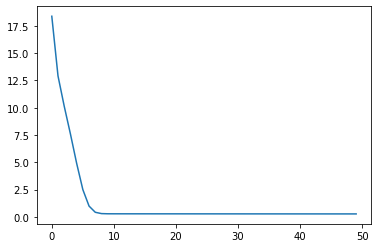

In [190]:
### Plotting the loss values

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.show()

In [191]:
model(torch.tensor([[1,2]]).float().to(device))

tensor([[1.6663]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Batch size

# Dataset, Data Loaders

In [227]:
from torch.utils.data import DataLoader, Dataset

In [228]:
x = [[1,2],[3,4],[2,3],[5,6]]
y = [[3],[7],[5],[11]]

In [229]:
class MyDataset(Dataset):
    ## Within this class, we store the information to fetch one data point at a point
    ## so that they can be bundled together to create batches
    
    def __init__(self, x, y) -> None:
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    
    
    
        
        

In [230]:
ds = MyDataset(x,y)

In [231]:
ds

In [236]:
dl = DataLoader(dataset=ds , batch_size=2, shuffle=True)

In [237]:
for x,y in dl:
    print(x,y)

tensor([[3., 4.],
        [5., 6.]], device='cuda:0') tensor([[ 7.],
        [11.]], device='cuda:0')
tensor([[2., 3.],
        [1., 2.]], device='cuda:0') tensor([[5.],
        [3.]], device='cuda:0')


In [238]:
model = MyNeuralNetwork().to(device)

In [247]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [248]:
### training loop
loss_history = []
for _ in range(50):
    for data in dl:
        print(f"epoch: {_}")
        x,y = data
        optimizer.zero_grad()
        loss_value = loss_fun(model(x), y)
        loss_value.backward()
        optimizer.step()
        loss_history.append(loss_value)
        print(f"Loss value: {loss_value}")        

epoch: 0
Loss value: 0.03845474123954773
epoch: 0
Loss value: 0.11626189947128296
epoch: 1
Loss value: 0.08820381760597229
epoch: 1
Loss value: 0.0659467875957489
epoch: 2
Loss value: 0.03218039870262146
epoch: 2
Loss value: 0.12185697257518768
epoch: 3
Loss value: 0.11489927768707275
epoch: 3
Loss value: 0.0396411158144474
epoch: 4
Loss value: 0.11479690670967102
epoch: 4
Loss value: 0.039682723581790924
epoch: 5
Loss value: 0.06553937494754791
epoch: 5
Loss value: 0.08836037665605545
epoch: 6
Loss value: 0.08778427541255951
epoch: 6
Loss value: 0.0660565048456192
epoch: 7
Loss value: 0.12140994518995285
epoch: 7
Loss value: 0.03231566771864891
epoch: 8
Loss value: 0.08761201798915863
epoch: 8
Loss value: 0.06610599905252457
epoch: 9
Loss value: 0.1142275333404541
epoch: 9
Loss value: 0.03994808718562126
epoch: 10
Loss value: 0.038973577320575714
epoch: 10
Loss value: 0.11513164639472961
epoch: 11
Loss value: 0.03165661543607712
epoch: 11
Loss value: 0.12182760238647461
epoch: 12
Loss

In [252]:
loss_history = [float(loss) for loss in loss_history]

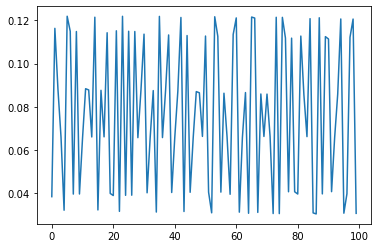

In [253]:
### Plotting the loss values

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.show()

In [249]:
new_val = [[1,2]]


In [250]:
new_val = torch.tensor(new_val).float().to(device)

In [251]:
model(new_val)

tensor([[3.4073]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Custom Loss Function  :  Useful in situations where we want customized loss fn like GANs

In [254]:
def custom_mse_func(_y, y):
    loss = (_y - y ) **2
    loss = loss.mean()
    return loss

In [257]:
y

tensor([[7.],
        [5.]], device='cuda:0')

In [262]:
_y = model(x)

In [261]:
x

tensor([[3., 4.],
        [2., 3.]], device='cuda:0')

In [263]:
_y

tensor([[7.0665],
        [5.2369]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [264]:
custom_mse_func(_y,y)

tensor(0.0303, device='cuda:0', grad_fn=<MeanBackward0>)

# Fetching intermediate layer values: Can directly call them with the help of model object

In [266]:
model.layer1(x)

tensor([[-0.4511, -1.5500, -0.2330,  4.0927,  4.1357,  1.9113,  4.3212, -1.3065],
        [-0.3969, -1.0448, -0.3420,  3.1018,  2.9249,  1.2430,  3.1969, -0.9820]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [268]:
model.layer1_activation(model.layer1(x))

tensor([[0.0000, 0.0000, 0.0000, 4.0927, 4.1357, 1.9113, 4.3212, 0.0000],
        [0.0000, 0.0000, 0.0000, 3.1018, 2.9249, 1.2430, 3.1969, 0.0000]],
       device='cuda:0', grad_fn=<ReluBackward0>)

In [269]:
# Can return the layer from forward method as well

In [270]:
class MyNeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        ### define layers of model
        
        self.layer1 = nn.Linear(2, 8)
        self.layer1_activation = nn.ReLU()
        self.layer2 = nn.Linear(8,1)
        
    def forward(self, X):
        ### method reserved for forward propogation. We can connect all layers here
        X = self.layer1(X)
        X = self.layer1_activation(X)
        X = self.layer2(X)
        return X, self.layer1   ##### returning from here
        
        

In [274]:
model_1 = MyNeuralNetwork().to(device)

In [276]:
model_1(x)[1]  

Linear(in_features=2, out_features=8, bias=True)

# sequential method to build neural networks

In [279]:
nn.Sequential?

Init signature: nn.Sequential(*args)
Docstring:     
A sequential container.
Modules will be added to it in the order they are passed in the
constructor. Alternatively, an ``OrderedDict`` of modules can be
passed in. The ``forward()`` method of ``Sequential`` accepts any
input and forwards it to the first module it contains. It then
"chains" outputs to inputs sequentially for each subsequent module,
finally returning the output of the last module.

The value a ``Sequential`` provides over manually calling a sequence
of modules is that it allows treating the whole container as a
single module, such that performing a transformation on the
``Sequential`` applies to each of the modules it stores (which are
each a registered submodule of the ``Sequential``).

What's the difference between a ``Sequential`` and a
:class:`torch.nn.ModuleList`? A ``ModuleList`` is exactly what it
sounds like--a list for storing ``Module`` s! On the other hand,
the layers in a ``Sequential`` are connected in a c

In [316]:
model_sequential = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
).to(device)

In [317]:
from torchsummary import summary

In [318]:
summary(model_sequential, x)

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [319]:
### training sequential model
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model_sequential.parameters(), lr = 0.001)
    

In [320]:
loss_history = []
for _ in range(50):
    for data in dl:
        x,y =data
        
        print(f"epoch: {_}")
        
        optimizer.zero_grad()
        loss_value = loss_func(model_sequential(x),x)
        loss_value.backward()
        optimizer.step()
        
        print(f"loss: {loss_value}")
        loss_history.append(loss_value)
        

epoch: 0
loss: 24.067731857299805
epoch: 0
loss: 5.024069786071777
epoch: 1
loss: 21.685775756835938
epoch: 1
loss: 4.5116682052612305
epoch: 2
loss: 19.52376365661621
epoch: 2
loss: 4.041593074798584
epoch: 3
loss: 6.359969139099121
epoch: 3
loss: 14.630585670471191
epoch: 4
loss: 15.658358573913574
epoch: 4
loss: 3.197967767715454
epoch: 5
loss: 3.1212258338928223
epoch: 5
loss: 13.592199325561523
epoch: 6
loss: 10.561674118041992
epoch: 6
loss: 4.028257369995117
epoch: 7
loss: 4.851878643035889
epoch: 7
loss: 7.819722652435303
epoch: 8
loss: 9.2512845993042
epoch: 8
loss: 1.8373770713806152
epoch: 9
loss: 7.920778274536133
epoch: 9
loss: 1.5678603649139404
epoch: 10
loss: 3.0427539348602295
epoch: 10
loss: 4.875150680541992
epoch: 11
loss: 4.364019393920898
epoch: 11
loss: 2.281775712966919
epoch: 12
loss: 2.1316778659820557
epoch: 12
loss: 3.3954904079437256
epoch: 13
loss: 3.0054092407226562
epoch: 13
loss: 1.561039686203003
epoch: 14
loss: 1.1856625080108643
epoch: 14
loss: 2.582

In [321]:
model_sequential(x)

tensor([[5.4201],
        [2.5601]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [322]:
x

tensor([[5., 6.],
        [2., 3.]], device='cuda:0')

# Saving and loading models

In [349]:
model_sequential.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0018, -0.0347],
                      [-0.4941, -0.1052],
                      [-0.3071,  0.8074],
                      [-0.6020, -0.6607],
                      [-0.4079, -0.5170],
                      [ 0.5525, -0.4582],
                      [ 0.4444,  0.4705],
                      [ 0.1087,  0.7295]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3032, -0.4335, -0.5587,  0.0798,  0.4355, -0.2290, -0.6710,  0.5503],
                     device='cuda:0')),
             ('2.weight',
              tensor([[-0.0618, -0.1212,  0.3796, -0.0308, -0.2466,  0.1482,  0.3440,  0.5353]],
                     device='cuda:0')),
             ('2.bias', tensor([-0.0571], device='cuda:0'))])

In [350]:
## state dict :  keys: layers, values: weights associated with these layers

In [351]:
## Can use torch.save method to save models. Also make sure to convert model to a cpu tensor so that it can run on any device

#### Can use torch.save method to save models. Also make sure to convert model to a cpu tensor so that it can run on any device

In [352]:
import os

In [353]:
os.makedirs("1", exist_ok=True)

In [354]:
path = os.path.join("1", "model.pth")

In [361]:
torch.save(model.to("cpu").state_dict(), path)

### Loading the model

In [364]:
### Before loading we should have definition of model also present

state_dict = torch.load(path)

In [366]:
state_dict

OrderedDict([('layer1.weight',
              tensor([[ 0.0736, -0.1277],
                      [-0.3793, -0.1259],
                      [ 0.3576, -0.2486],
                      [ 0.5536,  0.4373],
                      [ 0.5753,  0.6355],
                      [ 0.4493,  0.2189],
                      [ 0.2706,  0.8536],
                      [-0.2755, -0.0490]])),
             ('layer1.bias',
              tensor([-0.1609,  0.0914, -0.3112,  0.6828, -0.1322, -0.3123,  0.0948, -0.2840])),
             ('layer2.weight',
              tensor([[ 0.2589,  0.1275, -0.2879,  0.3094,  0.5195,  0.2698,  0.6349, -0.2537]])),
             ('layer2.bias', tensor([0.3926]))])

In [368]:
model_loaded = MyNeuralNetwork().load_state_dict(state_dict=state_dict)  ### need to call this on object of model class

In [369]:
model_loaded

<All keys matched successfully>